 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

algo_returns = Path(r"Files/algo_returns.csv")
sp_tsx_history_path = Path("Files/sp_tsx_history.csv")
whale_returns = Path(r"Files/whale_returns.csv")
history1 = Path("Files/sp_tsx_history.csv") 

In [3]:
#Reading the CSV to covert dates to datetime index
algo_returns = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history = pd.read_csv(sp_tsx_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
print(algo_returns.isnull().sum())
print(sp_tsx_history.isnull().sum())
print(whale_returns.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64
Close    0
dtype: int64
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [5]:
# Drop nulls
algo_returns.dropna(inplace = True)
sp_tsx_history.dropna(inplace = True)
whale_returns.dropna(inplace = True)

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns.info()
sp_tsx_history.info()
whale_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64


In [7]:
# Count nulls
print(algo_returns.isnull().sum())
print(sp_tsx_history.isnull().sum())
print(whale_returns.isnull().sum())

Algo 1    0
Algo 2    0
dtype: int64
Close    0
dtype: int64
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


In [8]:
# Drop nulls
sp_tsx_history.dropna(inplace = True)
algo_returns.dropna(inplace = True)
whale_returns.dropna(inplace = True)


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
#sp_tsx_history = pd.read_csv(sp_tsx_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(sp_tsx_history)

                 Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99
...                ...
2019-12-20  $17,118.44
2019-12-23  $17,128.71
2019-12-24  $17,180.15
2019-12-27  $17,168.21
2019-12-30  $17,098.56

[1818 rows x 1 columns]


In [10]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$","")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",","").astype("float")
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
# Calculate Daily Returns
sp_tsx_history = sp_tsx_history.pct_change()
#sp_tsx_history["Daily_return"] = sp_tsx_history ["Close"].pct_change()


In [13]:
# Drop nulls
#print(sp_tsx_history.isnull().sum())
sp_tsx_history.dropna(inplace = True)
sp_tsx_history.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history.columns = ["S&P_closing_return"]
sp_tsx_history.head()

,S&P_closing_return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combine_data = pd.concat([whale_returns, algo_returns, sp_tsx_history], axis="columns", join="inner")
combine_data = combine_data.sort_index()
combine_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_closing_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

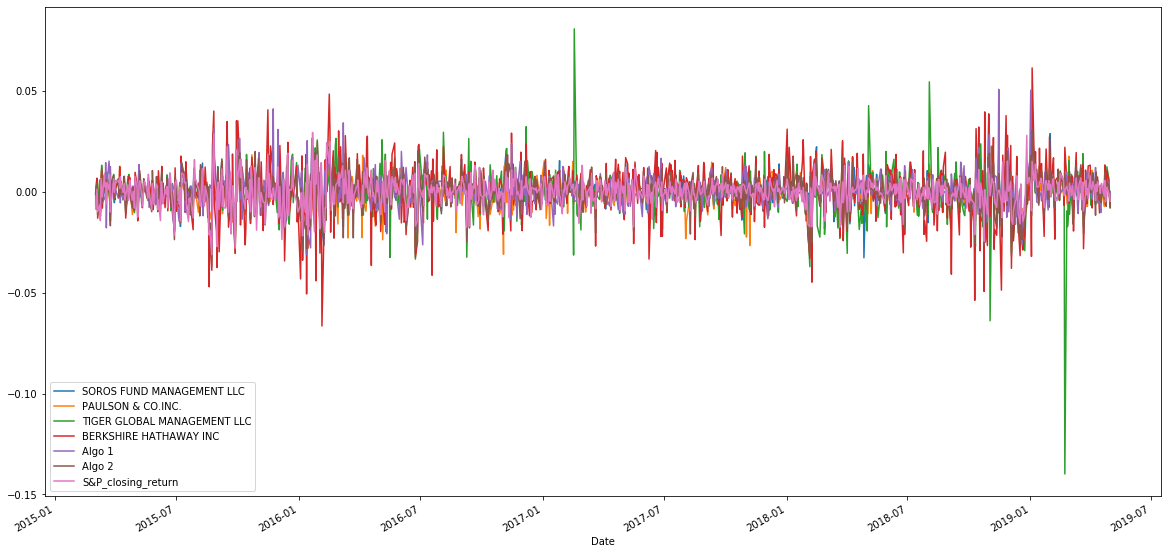

In [16]:
# Plot daily returns of all portfolios
combine_data.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

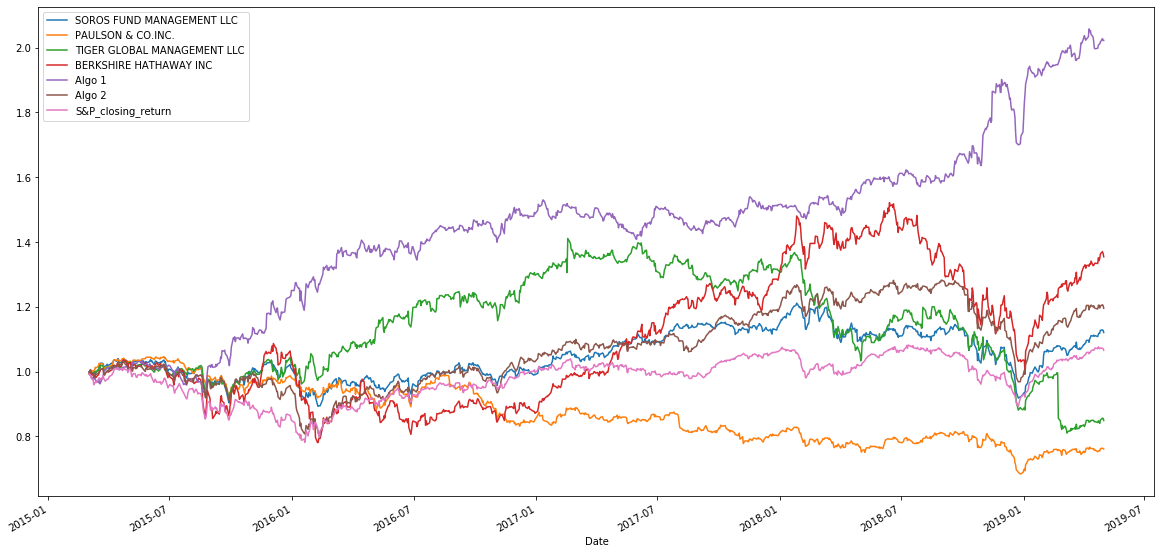

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1 + combine_data).cumprod()
#cumulative_return.head()

# Plot cumulative returns
cumulative_return.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


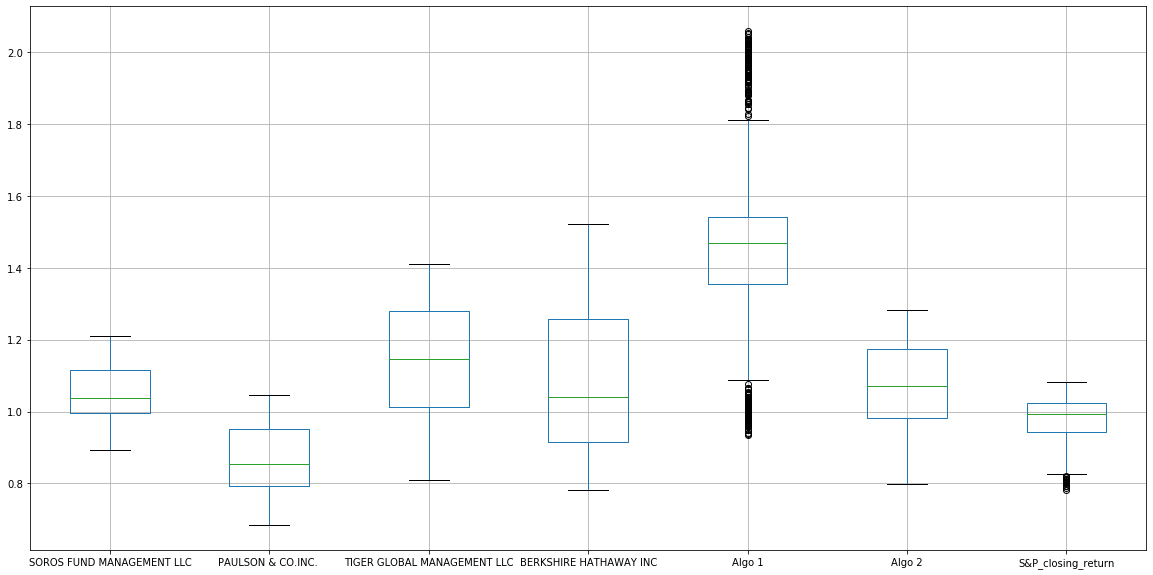

In [18]:
# Box plot to visually show risk
cumulative_return.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = combine_data.std() 
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P_closing_return             0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std = daily_std.sort_values(ascending = False)
# Determine which portfolios are riskier than the S&P TSX 60
daily_std.head(7)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P_closing_return             0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P_closing_return             0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

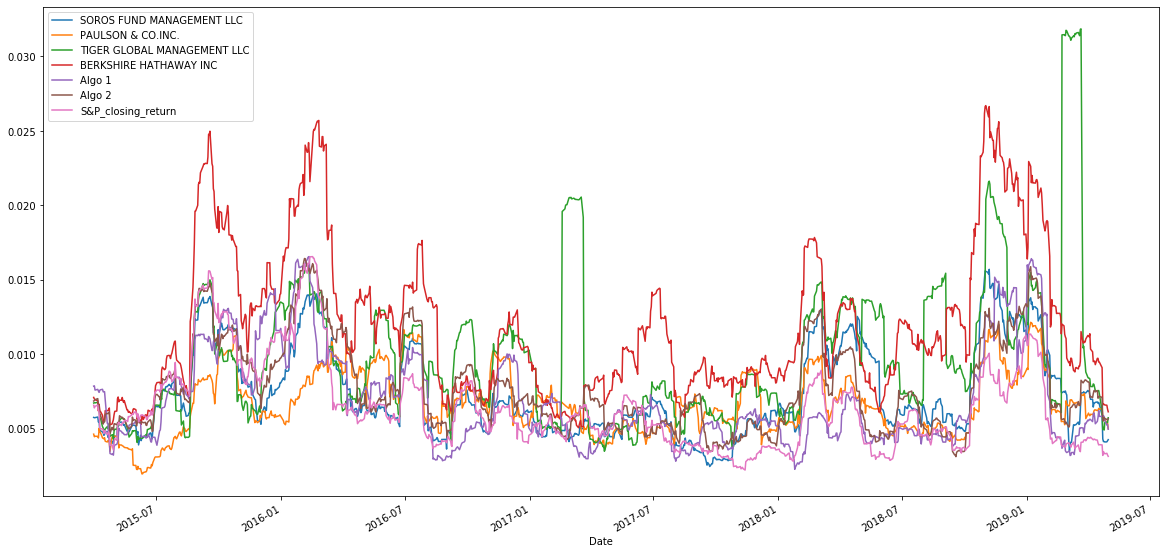

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combine_data.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

[]

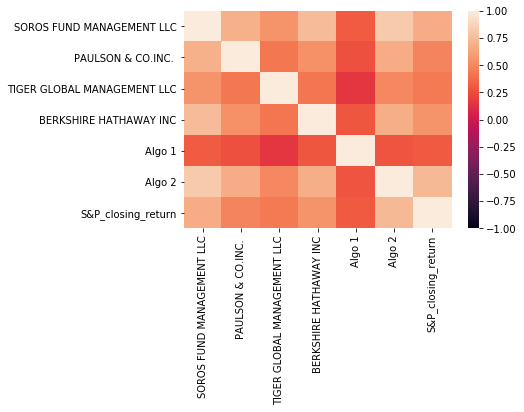

In [44]:
# Calculate the correlation
price_corr = combine_data.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(price_corr, vmin=-1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

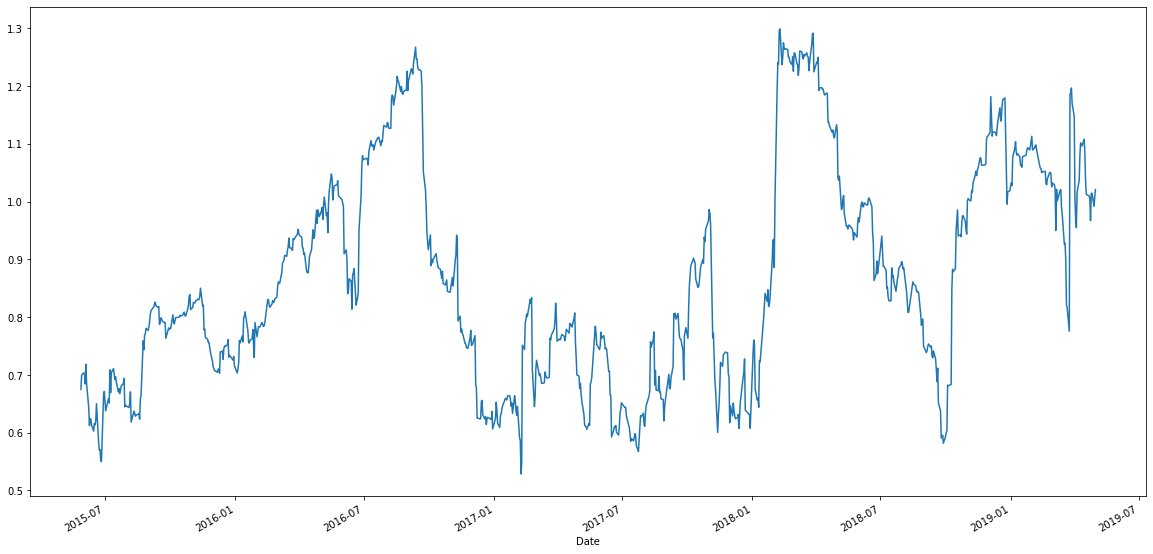

In [24]:
# Calculate covariance of a single portfolio
covariance = combine_data['Algo 2'].rolling(window=60).cov(combine_data['S&P_closing_return'])

# Calculate variance of S&P TSX
variance = combine_data['S&P_closing_return'].rolling(window=60).var()

# Computing beta
sp_beta = covariance / variance
sp_beta
# Plot beta trend
sp_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

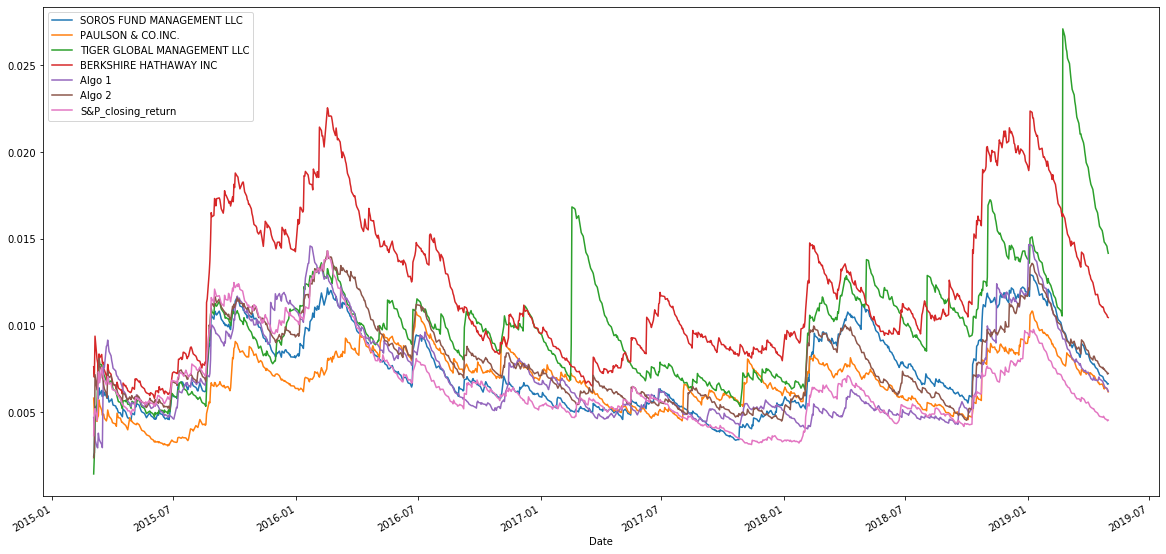

In [25]:
# Use `ewm` to calculate the rolling window
combine_data.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharp_ratio = combine_data.mean()*252 / combine_data.std()*np.sqrt(252)

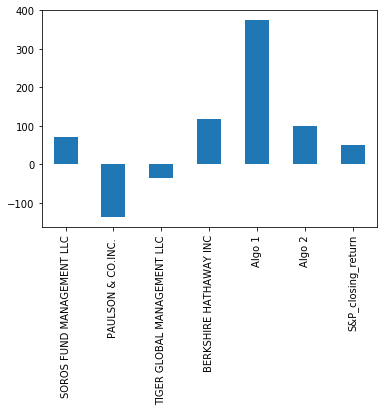

In [27]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Based on the cumulative returns, i believe that investing in Algo1 will give the highest return to the investor. Further, based on the standard daviation, S&P is better in terms of avoiding the risk however when we consider sharp ratios as higher the sharp ratio better the return we deduce that Alograthimic startegies are providing best risk adjusted returns to the investors.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [28]:
# Reading data from 1st stock
L = pd.read_csv("Files/L.csv")
L

,Date,L-closing
0,03-03-15 16:00,41.00
1,04-03-15 16:00,40.66
2,05-03-15 16:00,40.69
3,06-03-15 16:00,40.48
4,09-03-15 16:00,40.62
...,...,...
1043,24-04-19 16:00,49.49
1044,25-04-19 16:00,49.68
1045,26-04-19 16:00,50.18
1046,29-04-19 16:00,50.93


In [29]:
# Reading data from 2nd stock
#pd.read_excel("C:/Users/lenovo/class/Director/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Closing prices.xlsx",sheet_name ="OTEX")
otex = pd.read_csv("Files/otex.csv")
otex

,Date,otex - closing
0,03-03-15 16:00,29.06
1,04-03-15 16:00,28.95
2,05-03-15 16:00,28.79
3,06-03-15 16:00,28.38
4,09-03-15 16:00,28.75
...,...,...
1043,24-04-19 16:00,38.14
1044,25-04-19 16:00,38.35
1045,26-04-19 16:00,38.42
1046,29-04-19 16:00,38.27


In [30]:
# Reading data from 3rd stock
shop = pd.read_csv("Files/shop.csv")
#shop.head()
#shop.tail()
shop

,Date,shop - closing
0,21-05-15 16:00,25.68
1,22-05-15 16:00,28.31
2,26-05-15 16:00,29.65
3,27-05-15 16:00,27.50
4,28-05-15 16:00,27.45
...,...,...
987,24-04-19 16:00,219.81
988,25-04-19 16:00,218.97
989,26-04-19 16:00,222.28
990,29-04-19 16:00,225.79


In [31]:
# Combine all stocks in a single DataFrame
SHOP = pd.read_csv("Files/shop.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
Otex = pd.read_csv("Files/otex.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
l = pd.read_csv("Files/L.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

cumulative_stock_2 = pd.concat([SHOP,Otex,l],axis="columns",join="inner")
cumulative_stock_2


,shop - closing,otex - closing,L-closing
Date,,,
2015-05-21 16:00:00,25.68,21.23,41.05
2015-05-22 16:00:00,28.31,21.52,40.70
2015-05-26 16:00:00,29.65,21.38,40.05
2015-05-27 16:00:00,27.50,21.22,40.23
2015-05-28 16:00:00,27.45,21.27,40.33
...,...,...,...
2019-04-24 16:00:00,219.81,38.14,49.49
2019-04-25 16:00:00,218.97,38.35,49.68
2019-04-26 16:00:00,222.28,38.42,50.18


In [32]:
# Reset Date index
cumulative_stock_2.index=cumulative_stock_2.index.date
cumulative_stock_2.head()

,shop - closing,otex - closing,L-closing
2015-05-21,25.68,21.23,41.05
2015-05-22,28.31,21.52,40.70
2015-05-26,29.65,21.38,40.05
2015-05-27,27.50,21.22,40.23
2015-05-28,27.45,21.27,40.33


In [33]:
# Reorganize portfolio data by having a column per symbol

cum_stock = cumulative_stock_2.rename(columns = {'shop - closing' : 'SHOP','otex - closing' : 'OTEX', 'L-closing' :'L'})
cum_stock

,SHOP,OTEX,L
2015-05-21,25.68,21.23,41.05
2015-05-22,28.31,21.52,40.70
2015-05-26,29.65,21.38,40.05
2015-05-27,27.50,21.22,40.23
2015-05-28,27.45,21.27,40.33
...,...,...,...
2019-04-24,219.81,38.14,49.49
2019-04-25,218.97,38.35,49.68
2019-04-26,222.28,38.42,50.18
2019-04-29,225.79,38.27,50.93


In [34]:
# Calculate daily returns
cumdr = cum_stock.pct_change()
cumdr

# Drop NAs
cumdr.dropna(inplace=True)

# Display sample data
print(cumdr)

                SHOP      OTEX         L
2015-05-22  0.102414  0.013660 -0.008526
2015-05-26  0.047333 -0.006506 -0.015971
2015-05-27 -0.072513 -0.007484  0.004494
2015-05-28 -0.001818  0.002356  0.002486
2015-05-29 -0.009107 -0.002351 -0.005207
...              ...       ...       ...
2019-04-24 -0.016246  0.000525  0.001011
2019-04-25 -0.003821  0.005506  0.003839
2019-04-26  0.015116  0.001825  0.010064
2019-04-29  0.015791 -0.003904  0.014946
2019-04-30  0.078569  0.004703  0.007069

[991 rows x 3 columns]


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
pf_return =cum_stock.dot(weights)
# Display sample data
pf_return.head()

2015-05-21    29.320000
2015-05-22    30.176667
2015-05-26    30.360000
2015-05-27    29.650000
2015-05-28    29.683333
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
universal_return = pd.concat([combine_data,cumdr], axis = "columns", join="inner")

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
universal_return.dropna(inplace = True)
universal_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_closing_return,SHOP,OTEX,L
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.018182,0.001889,0.007420
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.016854,0.006631,0.011647
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,0.015504,0.013658,-0.008249
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139,0.015903,-0.009800,-0.019608
2015-04-06,0.005368,0.003763,0.004631,0.004920,-0.003298,0.006362,0.004927,-0.024052,-0.007072,-0.014486


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
rev_daily_std=universal_return.std()
#rev_daily_std.head
rev_annualized_std = rev_daily_std * np.sqrt(252)
rev_annualized_std = rev_annualized_std.sort_values(ascending = False)
rev_annualized_std.head(15)

SHOP                           0.512734
OTEX                           0.247883
BERKSHIRE HATHAWAY INC         0.209938
TIGER GLOBAL MANAGEMENT LLC    0.179685
L                              0.165087
Algo 2                         0.134961
SOROS FUND MANAGEMENT LLC      0.128328
Algo 1                         0.121213
S&P_closing_return             0.113713
PAULSON & CO.INC.              0.112976
dtype: float64

### Calculate and plot rolling `std` with 21-day window

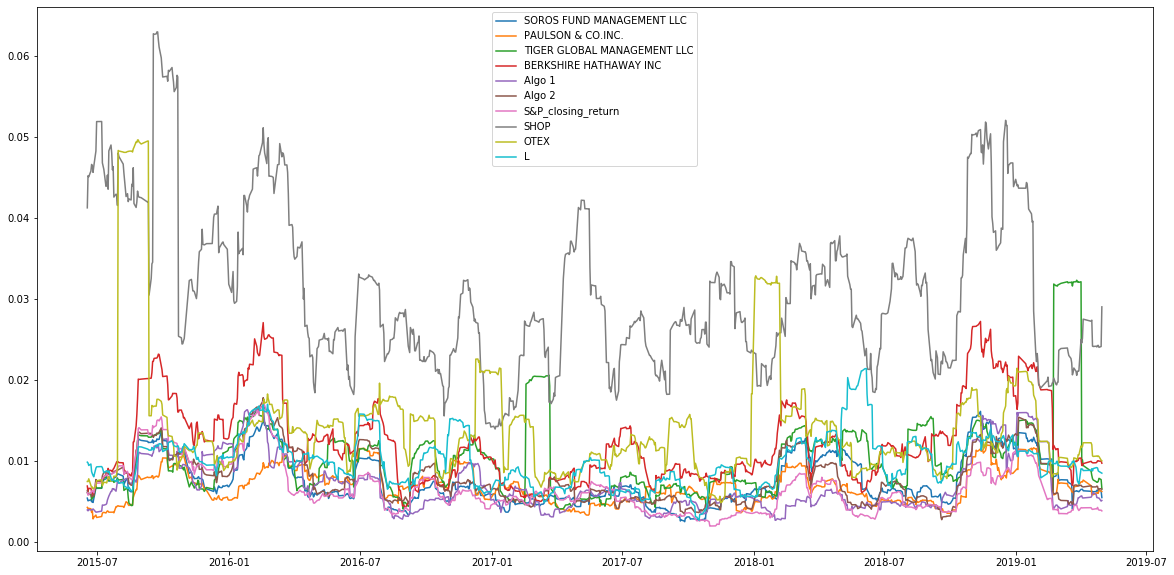

In [39]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
universal_return.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

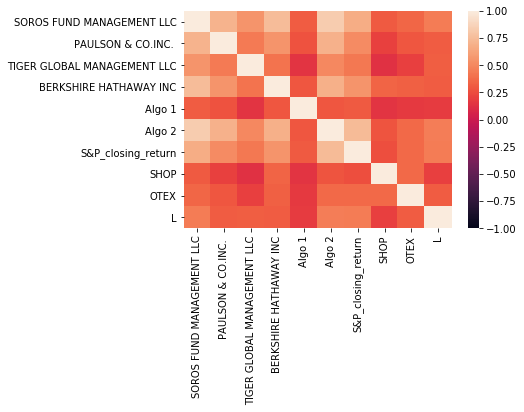

In [40]:
# Calculate and plot the correlation
price_corr_2 = universal_return.corr()
sns.heatmap(price_corr_2, vmin=-1,vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

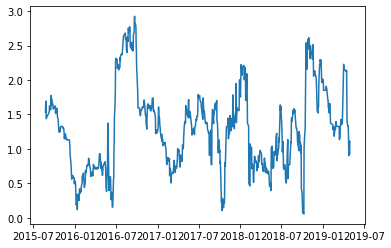

In [41]:
# Calculate and plot Beta
covariance_2 = universal_return['SHOP'].rolling(window=60).cov(universal_return['S&P_closing_return'])
variance_2 = universal_return['S&P_closing_return'].rolling(window=60).var()
beta_2 = covariance_2/variance_2
beta_2
beta_2.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
ann_shrp_ratio_2 = universal_return.mean() *252 / universal_return.std()*np.sqrt(252)

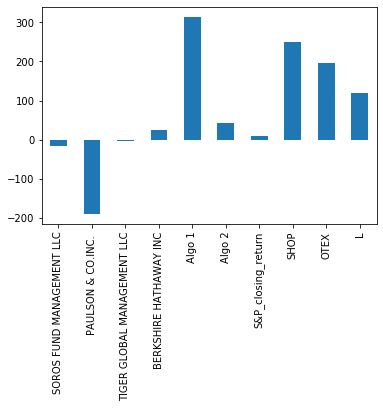

In [47]:
# Visualize the sharpe ratios as a bar plot
ann_shrp_ratio_2.plot(kind="bar")

### How does your portfolio do?

Based on the assessment perofrmed above we deduce that, Shopify have the highest Standard devaition which mean it is one of the extremely risky investments. Not only this the heat map also suggests that it is a corelated investment when compared with other investment porfolios.

However as mentioned above, when we observe the performance of Algo1  we have noticed that neither the investment is very risk based in the standard deviation nor is corelated as depicted in the Heatmap above. Further it also has the better sharp ratio than other investments.

Depending on the conclusion drawn above we deduce that ALGO 1 is a better investmnet plan as compared to other sources.